In [1]:
import astropy.units as u
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import pyoptica as po

In [30]:
def thin_lens(h0, u, f):
    if u == f:
        return np.inf, (np.inf/u) * (-1 * h0)
    else:
        if u == np.inf:
            return f, (f/u) * (-1 * h0)
        else:
            v = (u * f) / (u - f)
            return v, (v/u) * (-1 * h0)

print(thin_lens(200, 10, -100))


def opt_sys(h0, ds, fs):

    if len(ds) == len(fs):
        u_next, h_i = ds[0], h0

        for i in range(len(ds) - 1):
            v_i, h_i = thin_lens(h_i, u_next, fs[i])
            print(v_i, h_i)
            if v_i == np.inf:
                u_next = np.inf
            else:
                u_next = ds[i+1] - v_i
            print(u_next)

        v_f, h_f = thin_lens(h_i, u_next, fs[-1])
        return v_f, h_f
    
    else:
        raise ValueError("Optical Setup")
 
print(opt_sys(10, [100, 200], [100, 100]))

(-9.090909090909092, 181.81818181818184)
inf -inf
inf
(100, nan)


2024-04-26 00:05:00,203 - pyoptica.optical_elements.free_space.FreeSpace - INFO - Propagated using 'ASPW' to 5e+01 cm.
2024-04-26 00:05:00,722 - pyoptica.optical_elements.free_space.FreeSpace - INFO - Propagated using 'ASPW' to 5e+01 cm.
2024-04-26 00:05:01,057 - pyoptica.optical_elements.free_space.FreeSpace - INFO - Propagated using 'ASPW' to 5e+01 cm.
2024-04-26 00:05:01,513 - pyoptica.optical_elements.free_space.FreeSpace - INFO - Propagated using 'ASPW' to 5e+01 cm.


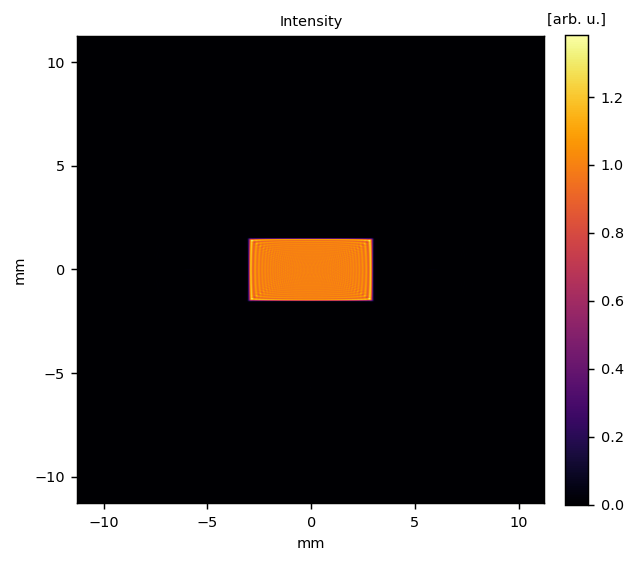

In [2]:
wavelength = 500 * u.nm # you see how easy it is? Just multiply your value by the unit!
pixel_scale = 0.022 * u.mm
npix = 1024

w = 6 * u.mm
h = 3 * u.mm
f= 50 * u.cm
axis_unit = u.mm

wf = po.Wavefront(wavelength, pixel_scale, npix)
ap = po.RectangularAperture(w, h)
r = 2 * u.mm
lens = po.ThinLens(2*r, f)
fs = po.FreeSpace(f)
wf_imaged = wf * ap * fs * lens * fs * fs * lens * fs
fig_1, ax, im = wf_imaged.plot(
    intensity='default',
    fig_options=dict(figsize=(5, 5), dpi=130)
)